In [17]:
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

\begin{equation*}
0 = (\partial_t + \tfrac{1}{2}\sigma^2\partial_{SS})H - \phi q^2 + \sup_{\nu}\{(\nu(S - f(\nu))\partial_x - g(\nu) \partial_S - \nu \partial_q)H\}
\end{equation*}
<div style="text-align:left; vertical-align:middle; line-height:2; margin-left:50px;">

- $f(\nu) = k\nu$
- $g(\nu) = b\nu$
- the terminal condition $H(T,x,S,q)=x+Sq-\alpha q^2$
</div>


<div style="text-align:left; vertical-align:middle; line-height:2; margin-left:50px;">

It can be solved explicitly and the optimal speed to trade is
\begin{equation*}
\nu_t^* = \gamma \frac{\zeta e^{\gamma(T-t)} + e^{-\gamma(T-t)}}{\zeta e^{\gamma(T-t)} - e^{-\gamma(T-t)}}\, Q_t^{{\nu}^*}
\end{equation*}

From this equation, it is also possible to obtain the agent's inventory $Q_t^{\nu^*}$ that results from following this strategy.

\begin{equation*}
Q_t^{\nu^*} = \frac{\zeta e^{\gamma(T-t)} + e^{-\gamma(T-t)}}{\zeta e^{\gamma(T-t)} - e^{-\gamma(T-t)}} \,Q_0.
\end{equation*}

\begin{align*}
\gamma = \sqrt{\frac{\phi}{k}},\quad \zeta=\frac{\alpha-\frac{1}{2}b+\sqrt{k\phi}}{\alpha-\frac{1}{2}b-\sqrt{k\phi}}
\end{align*}
<div>

In [7]:
# Parameter settings
T = 1
Ndt = 6.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.001
b = 0.001

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-10, 0.001, 0.01, 0.1])
alpha0 = 0.01

In [3]:
def calculate_inventory_trading_speed(alpha, phi, t, tt, T, b, k):
    tau = T - t
    zeta = ((alpha - 0.5 * b) + np.sqrt(k * phi)) / ((alpha - 0.5 * b) - np.sqrt(k * phi))
    gamma = np.sqrt(phi / k)
    chi = np.sqrt(k * phi) * np.divide(1 + zeta * np.exp(2 * gamma * tau), 1 - zeta * np.exp(2 * gamma * tau))
    Q = np.divide(zeta * np.exp(gamma * tau) - np.exp(-gamma * tau), zeta * np.exp(gamma * T) - np.exp(-gamma * T))
    nu = np.multiply(-chi, Q) / k
    Qt = inter_extrapolation(t, Q, tt)
    nut = inter_extrapolation(t, nu, tt)
    return Q, nu, Qt, nut

def inter_extrapolation(x, y, e):
    new_x = np.sort(x)
    new_y = y[np.argsort(x)]

    def point_wise(ep):
        if ep < new_x[0]:
            return new_y[0] + (ep - new_x[0]) * (new_y[1] - new_y[0]) / (new_x[1] - new_x[0])
        elif ep > new_x[-1]:
            return new_y[-1] + (ep - new_x[-1]) * (new_y[-1] - new_y[-2]) / (new_x[-1] - new_x[-2])
        else:
            return np.interp([ep], x, y)[0]
    return np.array([point_wise(i) for i in e])

Text(0.5, 0.98, 'alpha = 0.01')

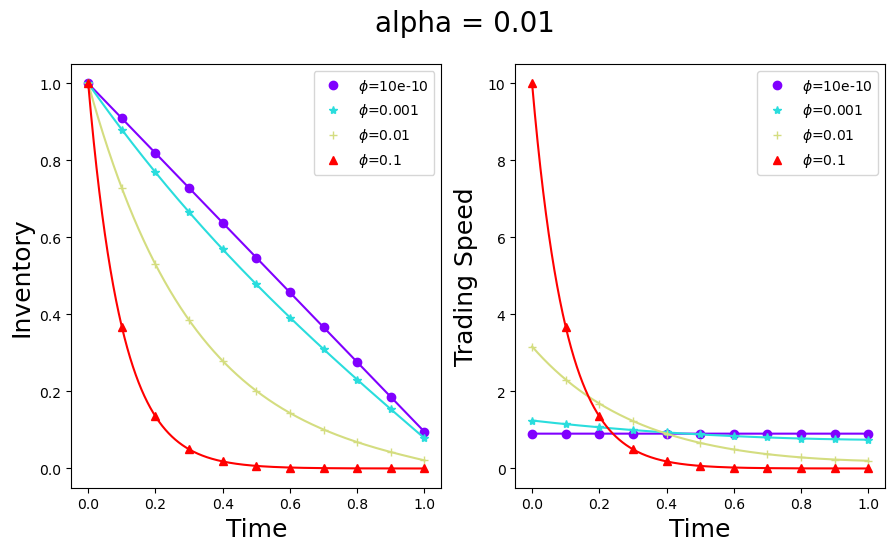

In [26]:
symb = np.array(["o", "*", "+", "^"])
fig, (ax_inv, ax_trad) = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
norm = Normalize(vmin=0, vmax=myphi.shape[0] - 1)
labels = ["$\phi$=10e-10","$\phi$=0.001","$\phi$=0.01","$\phi$=0.1"]
for index, phi in zip(range(myphi.shape[0]), myphi):
    color =  plt.cm.rainbow(norm(index))
    inv_line, trad_line, inv_dot, trad_dot = calculate_inventory_trading_speed(alpha0, phi, t, tt, T, b, k)
    plt1, = ax_inv.plot(tt, inv_dot, color=color, marker=symb[index], label = labels[index],linestyle='None')
    plt2, = ax_trad.plot(tt, trad_dot, color=color, marker=symb[index], label = labels[index],linestyle='None')
    plt3, = ax_inv.plot(t, inv_line, color=color, linestyle='-')
    plt4, = ax_trad.plot(t, trad_line, color=color, linestyle='-')
ax_inv.legend()
ax_inv.set_xlabel(r"Time", fontsize=18)
ax_inv.set_ylabel(r"Inventory", fontsize=18)
ax_trad.legend()
ax_trad.set_xlabel(r"Time", fontsize=18)
ax_trad.set_ylabel(r"Trading Speed", fontsize=18)
ax_trad.yaxis.set_label_coords(-0.1,0.5)
plt.suptitle("alpha = 0.01", fontsize=20)


### Another example
the non-linear $\textbf{PDE}$ for $h$ as
$$
\partial_th - \phi q^2 + F^*(-(bq + \partial_q h)) = 0, \quad h(t,q) = -\alpha q^2
$$
where $F(x)= k x^{1+a}$. Then, 
$$
F^*(y) = \sup_x(xy - k x^{1+a}).
$$
First order condtion implies 
$$
x^* = \Big ( \frac{y}{(1+a)k} \Big )^{\frac{1}{a}},
$$
and so
$$
F^*(y) = \xi y^{1 + \frac{1}{a}},  \quad  \xi = \frac{ak}{((1+a)k)^{1+\frac{1}{a}}}
$$
and the optimal trading speed in feedback form is 
$$
\nu^* = \Big ( -\frac{bq + \partial_q h}{(1 + a) k} \Big )^{\frac{1}{a}}.
$$
$b=k=10^{-4}$, $\phi = 10 k$, $\alpha = 100 k$, and $T=1$.

In [27]:
# Parameter Settings
a = np.array([1, 0.8, 0.6])
k = 0.0001
b = 0.0001

phi = 10 * k
alpha = 100 * k
T = 1
qmax = 1

Ndt = 10000
Ndq = 100

dt = T / Ndt
dq = qmax / Ndq

In [46]:
def solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq):
    """ This function solves for optimal trading speed in feed back form as nus, and inventory of optimal path as Qs.
    They are used to be presented as a function of time, t.
    """
    t = np.arange(0, T+dt, dt)
    q = np.arange(0, qmax+dq, dq)

    nus = np.full((Ndt+1, a.shape[0]), np.NaN)
    Qs = np.full((Ndt+1, a.shape[0]), np.NaN)
    Qs[0,:] = qmax

    for i in range(0, a.shape[0], 1):
        xi = (a[i] * k) / ((1 + a[i]) * k) ** (1 + 1/a[i])

        g = np.full((Ndq+1, Ndt+1), np.NaN)
        nu = np.full((Ndq+1, Ndt+1), np.NaN)
        
        g[:, g.shape[1]-1] = -(alpha ** a[i]) / k ** (a[i] - 1) * np.power(q, 1 + a[i]) + 0.5 * b * np.power(q, 2)

        for j in range(Ndt-1, -1, -1):

            # Explicit Scheme
            dqg = (g[1:g.shape[0], j+1] - g[0:(g.shape[0]-1), j+1]) / dq
            g[1:g.shape[0], j] = g[1:g.shape[0], j+1] + dt * (-phi * np.power(q[1:q.shape[0]], 2) + xi * (np.power(-dqg, 1 + 1 / a[i])))
            g[0, j] = 0

            dqg = (g[1:g.shape[0], j] - g[0:(g.shape[0]-1), j]) / dq
            nu[1:nu.shape[0], j] = np.power(-dqg / ((1 + a[i]) * k), 1 / a[i])
            nu[0, j] = 0

        for j in range(0, Ndt, 1):
            nus[j, i] = inter_extrapolation(q, nu[:, j], [Qs[j, i]])
            Qs[j+1, i] = Qs[j, i] - nus[j, i] * dt

    return nus, Qs, t, q

In [47]:
nus, Qs, t, q = solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq)

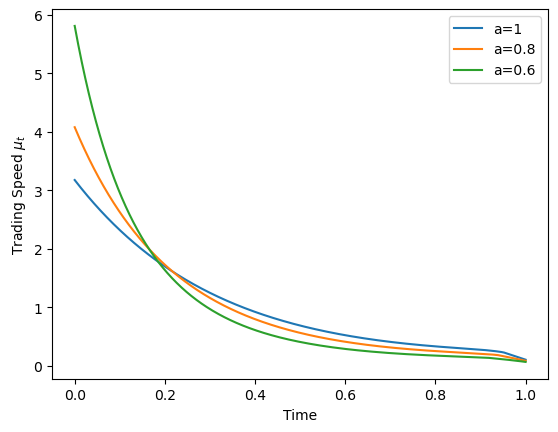

In [48]:
labels = ["a=1", "a=0.8", "a=0.6"]
fig.set_size_inches(10.5, 5.5)
for i in range(3):
    plt.plot(t, nus[:,i], label = labels[i])
plt.ylabel("Trading Speed $\mu_t$")
plt.xlabel("Time")
plt.legend()

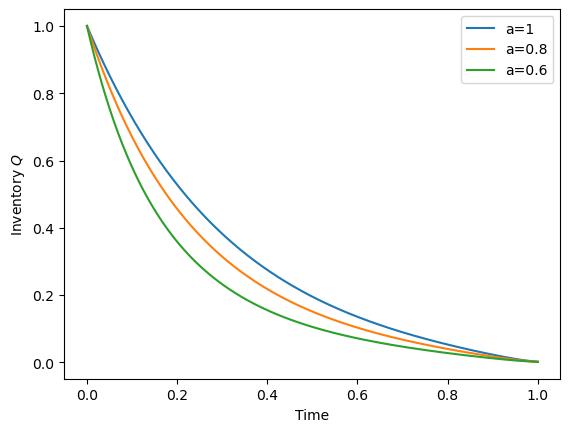

In [49]:
labels = ["a=1", "a=0.8", "a=0.6"]
fig.set_size_inches(10.5, 5.5)
for i in range(3):
    plt.plot(t, Qs[:,i], label = labels[i])
plt.ylabel("Inventory $Q$")
plt.xlabel("Time")
plt.legend()